# Load the data

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
GDP_data = pd.read_csv("data.csv")

# Basic inspection
GDP_data




,Date,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
0,1994-03-31,2347597.0,274432.0,20.0,25.666667,505201.0,1341416.0
1,1994-06-30,2370502.0,280433.0,20.0,26.000000,505206.0,1354509.0
2,1994-09-30,2397159.0,288152.0,20.0,27.000000,502942.0,1368367.0
3,1994-12-31,2441705.0,299025.0,20.0,27.333333,497292.0,1385567.0
4,1995-03-31,2447808.0,305911.0,17.0,28.000000,484801.0,1415147.0
...,...,...,...,...,...,...,...
116,2023-03-31,4614117.0,681444.0,33.0,108.000000,902634.0,3099111.0
117,2023-06-30,4645950.0,709479.0,33.0,109.666667,91656800.0,3100030.0
118,2023-09-30,4626804.0,676467.0,32.0,111.333333,921594.0,3095099.0
119,2023-12-31,4642859.0,674911.0,32.0,113.000000,918141.0,3096942.0


In [293]:
GDP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            121 non-null    object 
 1   GDP             120 non-null    float64
 2   GFCF            120 non-null    float64
 3   UNEM            120 non-null    float64
 4   ConsumerPrices  120 non-null    float64
 5   GovExp          120 non-null    float64
 6   HouseExp        120 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [294]:
GDP_data.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP,120.0,6.688985e+06,3.278402e+07,2.347597e+06,2902988.25,3.899362e+06,4.450160e+06,362727300.0
GFCF,120.0,1.208034e+06,6.811389e+06,2.744320e+05,380164.75,6.525295e+05,7.548502e+05,75176200.0
UNEM,120.0,5.103333e+01,2.806991e+02,1.700000e+01,23.00,2.500000e+01,2.725000e+01,3100.0
ConsumerPrices,120.0,1.241222e+02,6.793871e+02,2.566667e+01,42.25,5.916667e+01,8.066667e+01,7500.0
GovExp,120.0,1.458945e+06,8.304558e+06,4.649380e+05,528066.50,7.368300e+05,8.531228e+05,91656800.0
HouseExp,120.0,4.670058e+06,2.573719e+07,1.341416e+06,1739040.50,2.438482e+06,2.834947e+06,284187900.0


## EDA

In [295]:
GDP_data['Date'] = pd.to_datetime(GDP_data['Date'], errors='coerce')

# Check if any conversion failed (NaT values)
missing_dates = GDP_data['Date'].isna().sum()
print(f"Number of missing or invalid dates: {missing_dates}")



Number of missing or invalid dates: 0


In [296]:
# 2. Check duplicates
if 'Date' in GDP_data.columns:
    duplicate_rows = GDP_data[GDP_data.duplicated(subset=['Date'], keep=False)]
else:
    duplicate_rows = GDP_data[GDP_data.duplicated(keep=False)]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Show duplicates if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


In [297]:
# 3. Missing values
print(GDP_data.isnull().sum())

missing_rows = GDP_data[GDP_data.isnull().any(axis=1)]
print(missing_rows)

Date              0
GDP               1
GFCF              1
UNEM              1
ConsumerPrices    1
GovExp            1
HouseExp          1
dtype: int64
         Date        GDP      GFCF  UNEM  ConsumerPrices    GovExp   HouseExp
11 1996-12-31  2610170.0  352897.0  19.0             NaN  504256.0  1527520.0
23 1999-12-31  2755314.0  352169.0  23.0       38.000000       NaN  1634660.0
38 2003-09-30  3106913.0  436406.0  28.0       49.000000  580549.0        NaN
46 2005-09-30        NaN  545354.0  24.0       51.000000  613099.0  2088994.0
66 2010-09-30  3990352.0       NaN  25.0       57.000000  739399.0  2540846.0
69 2011-06-30  4089919.0  718704.0   NaN       59.333333  770420.0  2600189.0


In [298]:
GDP_data_1 = GDP_data.copy()

numeric_cols = ['GDP', 'GFCF', 'UNEM', 'ConsumerPrices', 'GovExp', 'HouseExp']
GDP_data_1[numeric_cols] = GDP_data[numeric_cols].fillna(GDP_data[numeric_cols].median())

GDP_data_1 = GDP_data.sort_values('Date')  # ensure chronological order
GDP_data_1[numeric_cols] = GDP_data[numeric_cols].ffill()


In [299]:
GDP_data_1.isnull().sum()



Date              0
GDP               0
GFCF              0
UNEM              0
ConsumerPrices    0
GovExp            0
HouseExp          0
dtype: int64

In [300]:
GDP_data_1.drop(columns=['Date']).describe().T

,count,mean,std,min,25%,50%,75%,max
GDP,121.0,6.661783e+06,3.264850e+07,2.347597e+06,2904913.0,3882180.0,4.450025e+06,362727300.0
GFCF,121.0,1.203632e+06,6.783122e+06,2.744320e+05,380957.0,653876.0,7.546340e+05,75176200.0
UNEM,121.0,5.081818e+01,2.795371e+02,1.700000e+01,23.0,25.0,2.700000e+01,3100.0
ConsumerPrices,121.0,1.233526e+02,6.766034e+02,2.566667e+01,42.0,59.0,8.033333e+01,7500.0
GovExp,121.0,1.450965e+06,8.270349e+06,4.649380e+05,524441.0,735328.0,8.531040e+05,91656800.0
HouseExp,121.0,4.646572e+06,2.563103e+07,1.341416e+06,1742516.0,2438418.0,2.833132e+06,284187900.0


In [301]:

GDP_data_1.sort_index(inplace=True)

GDP_data_1

,Date,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
0,1994-03-31,2347597.0,274432.0,20.0,25.666667,505201.0,1341416.0
1,1994-06-30,2370502.0,280433.0,20.0,26.000000,505206.0,1354509.0
2,1994-09-30,2397159.0,288152.0,20.0,27.000000,502942.0,1368367.0
3,1994-12-31,2441705.0,299025.0,20.0,27.333333,497292.0,1385567.0
4,1995-03-31,2447808.0,305911.0,17.0,28.000000,484801.0,1415147.0
...,...,...,...,...,...,...,...
116,2023-03-31,4614117.0,681444.0,33.0,108.000000,902634.0,3099111.0
117,2023-06-30,4645950.0,709479.0,33.0,109.666667,91656800.0,3100030.0
118,2023-09-30,4626804.0,676467.0,32.0,111.333333,921594.0,3095099.0
119,2023-12-31,4642859.0,674911.0,32.0,113.000000,918141.0,3096942.0


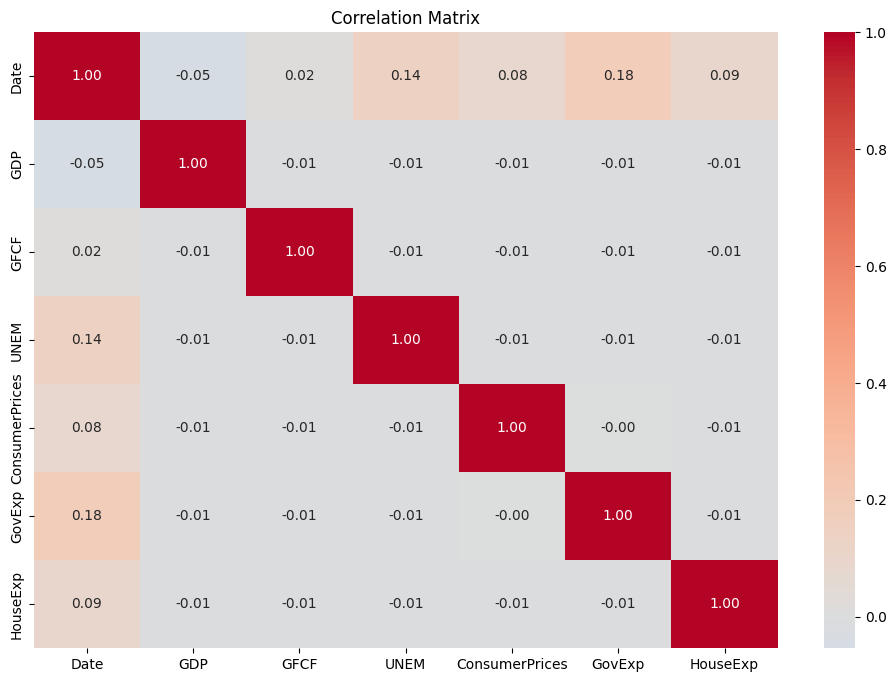

GDP               1.000000
GovExp           -0.009540
HouseExp         -0.009643
GFCF             -0.010175
ConsumerPrices   -0.010732
UNEM             -0.010881
Date             -0.053932
Name: GDP, dtype: float64


In [ ]:

# Compute correlation matrix
corr_matrix = GDP_data_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with GDP
print(corr_matrix['GDP'].sort_values(ascending=False))


In [303]:
# Compute correlation
corr_matrix = GDP_data_cleaned.corr()

# Select features highly correlated with GDP
threshold = 0.01  # adjust as needed
selected_features = corr_matrix['GDP'][abs(corr_matrix['GDP']) > threshold].index.tolist()

# Remove GDP itself from features
selected_features.remove('GDP')

print("Selected features based on correlation:", selected_features)


Selected features based on correlation: ['Date', 'GFCF', 'UNEM', 'ConsumerPrices']


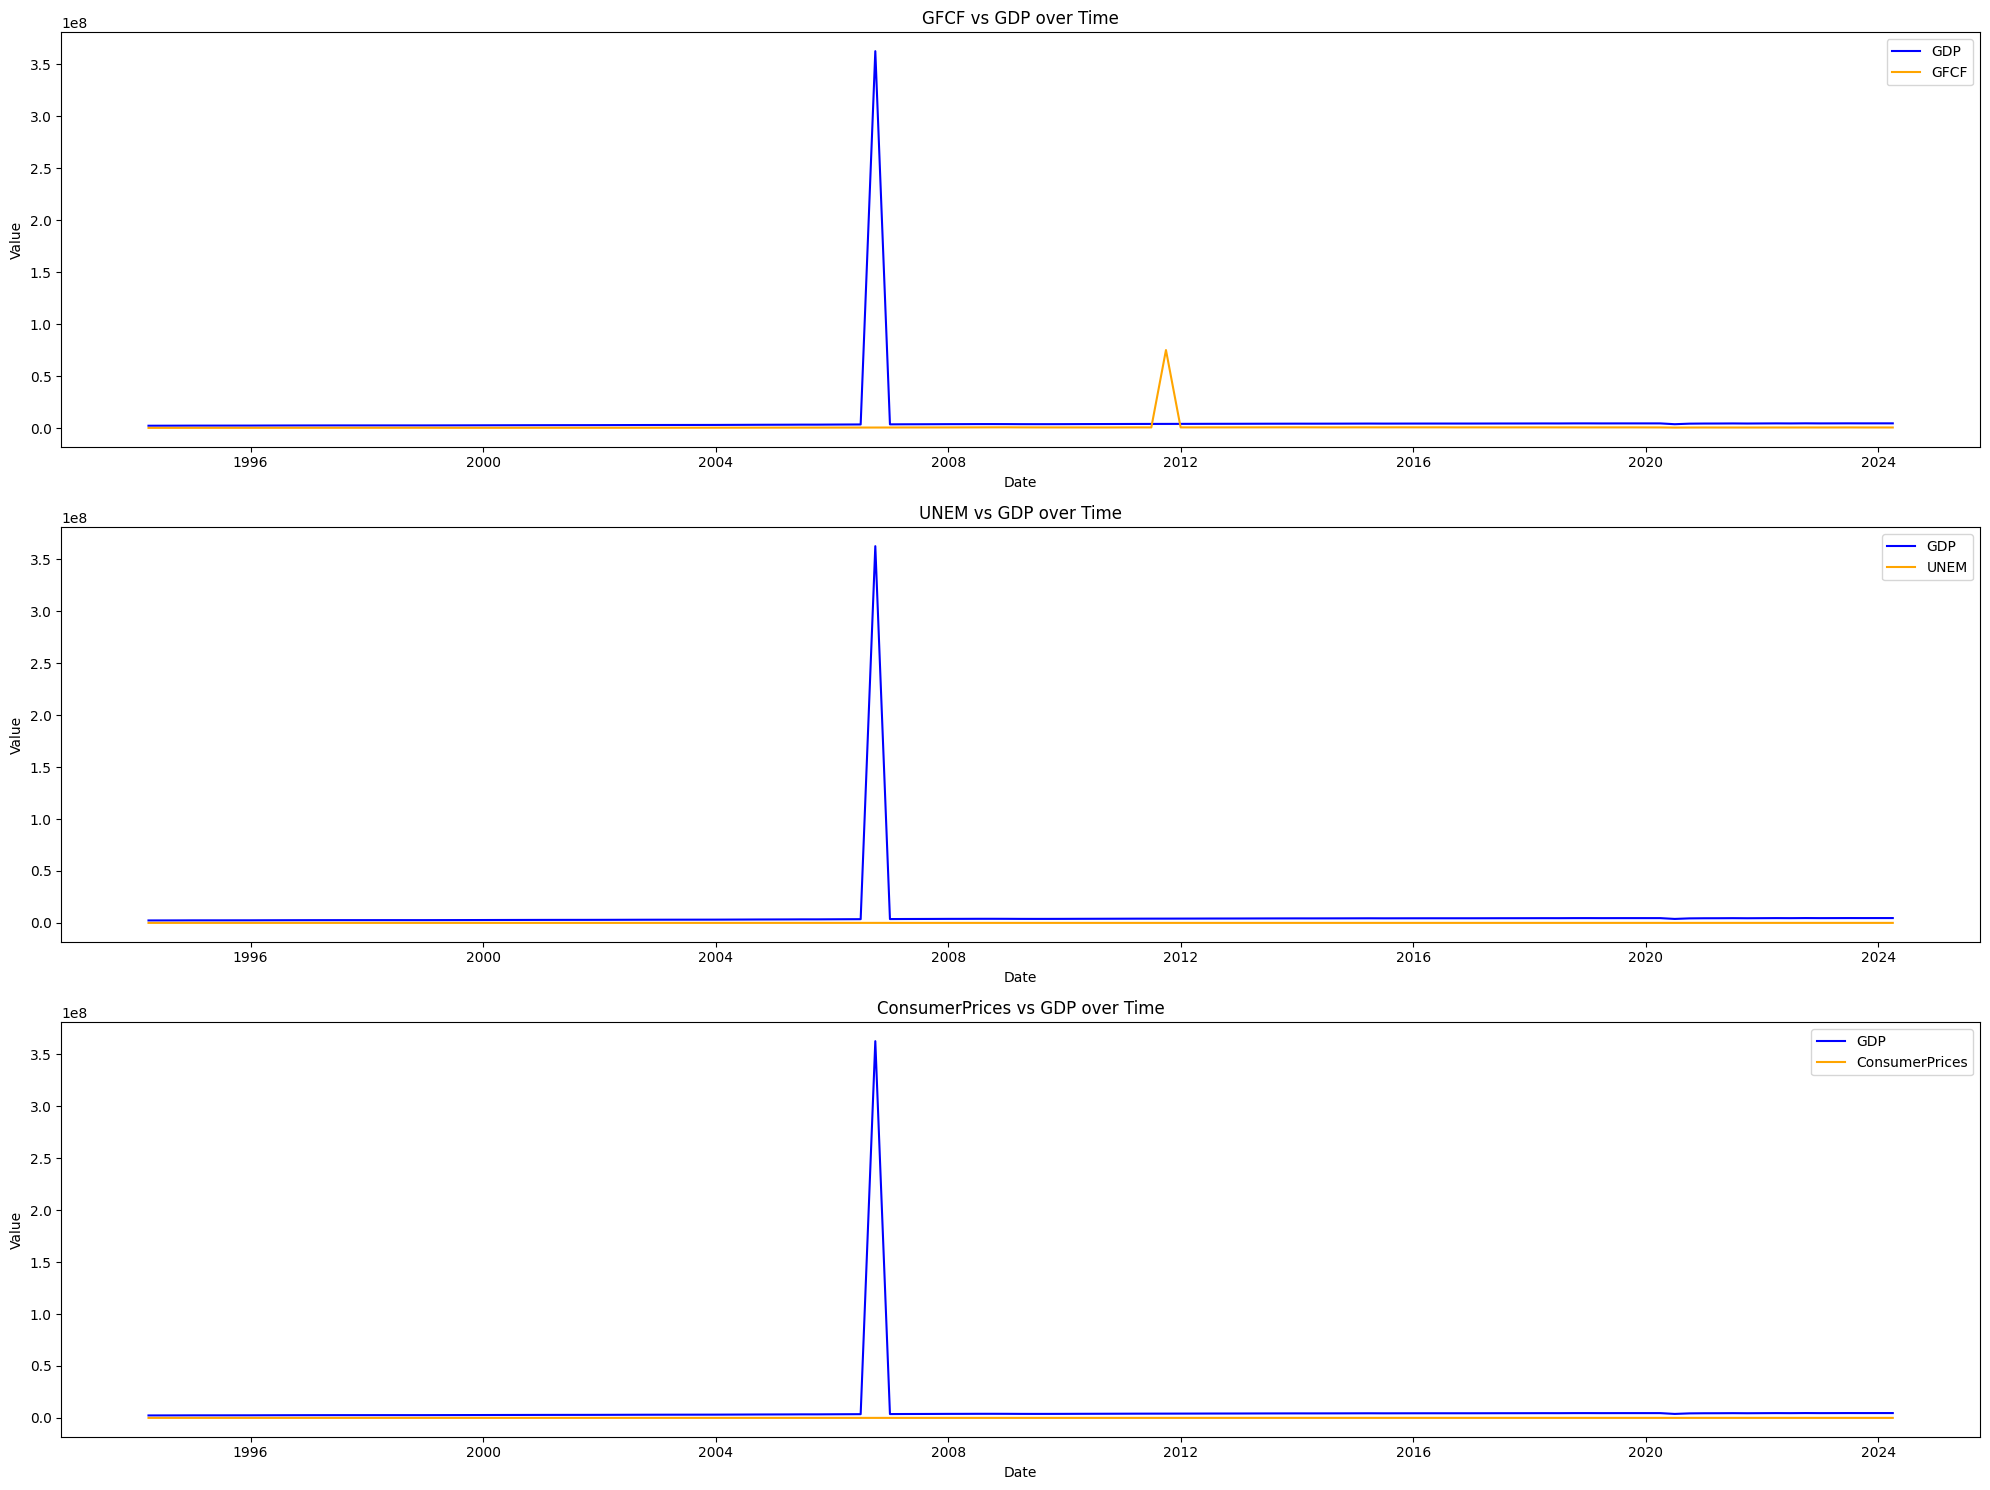

In [ ]:

numerical_features = ['GFCF', 'UNEM', 'ConsumerPrices']

# Ensure 'Date' is datetime
GDP_data_1['Date'] = pd.to_datetime(GDP_data_1['Date'])

# Plot each feature vs GDP over time
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.lineplot(x='Date', y='GDP', data=GDP_data_1, label='GDP', color='blue')
    sns.lineplot(x='Date', y=feature, data=GDP_data_1, label=feature, color='orange')
    plt.title(f'{feature} vs GDP over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:


# Selected features (including GDP)
selected_features = ['Date', 'GDP', 'GFCF', 'UNEM', 'ConsumerPrices']

# Create new dataframe with only selected features
GDP_selected = GDP_data_1[selected_features].copy()

# Remove outliers using IQR for numerical features
numerical_cols = ['GDP', 'GFCF', 'UNEM', 'ConsumerPrices']

for col in numerical_cols:
    Q1 = GDP_selected[col].quantile(0.25)
    Q3 = GDP_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    GDP_selected = GDP_selected[(GDP_selected[col] >= lower_bound) & (GDP_selected[col] <= upper_bound)]

# Reset index
GDP_selected.reset_index(drop=True, inplace=True)

GDP_selected


,Date,GDP,GFCF,UNEM,ConsumerPrices
0,1994-03-31,2347597.0,274432.0,20.0,25.666667
1,1994-06-30,2370502.0,280433.0,20.0,26.000000
2,1994-09-30,2397159.0,288152.0,20.0,27.000000
3,1994-12-31,2441705.0,299025.0,20.0,27.333333
4,1995-03-31,2447808.0,305911.0,17.0,28.000000
...,...,...,...,...,...
109,2023-03-31,4614117.0,681444.0,33.0,108.000000
110,2023-06-30,4645950.0,709479.0,33.0,109.666667
111,2023-09-30,4626804.0,676467.0,32.0,111.333333
112,2023-12-31,4642859.0,674911.0,32.0,113.000000


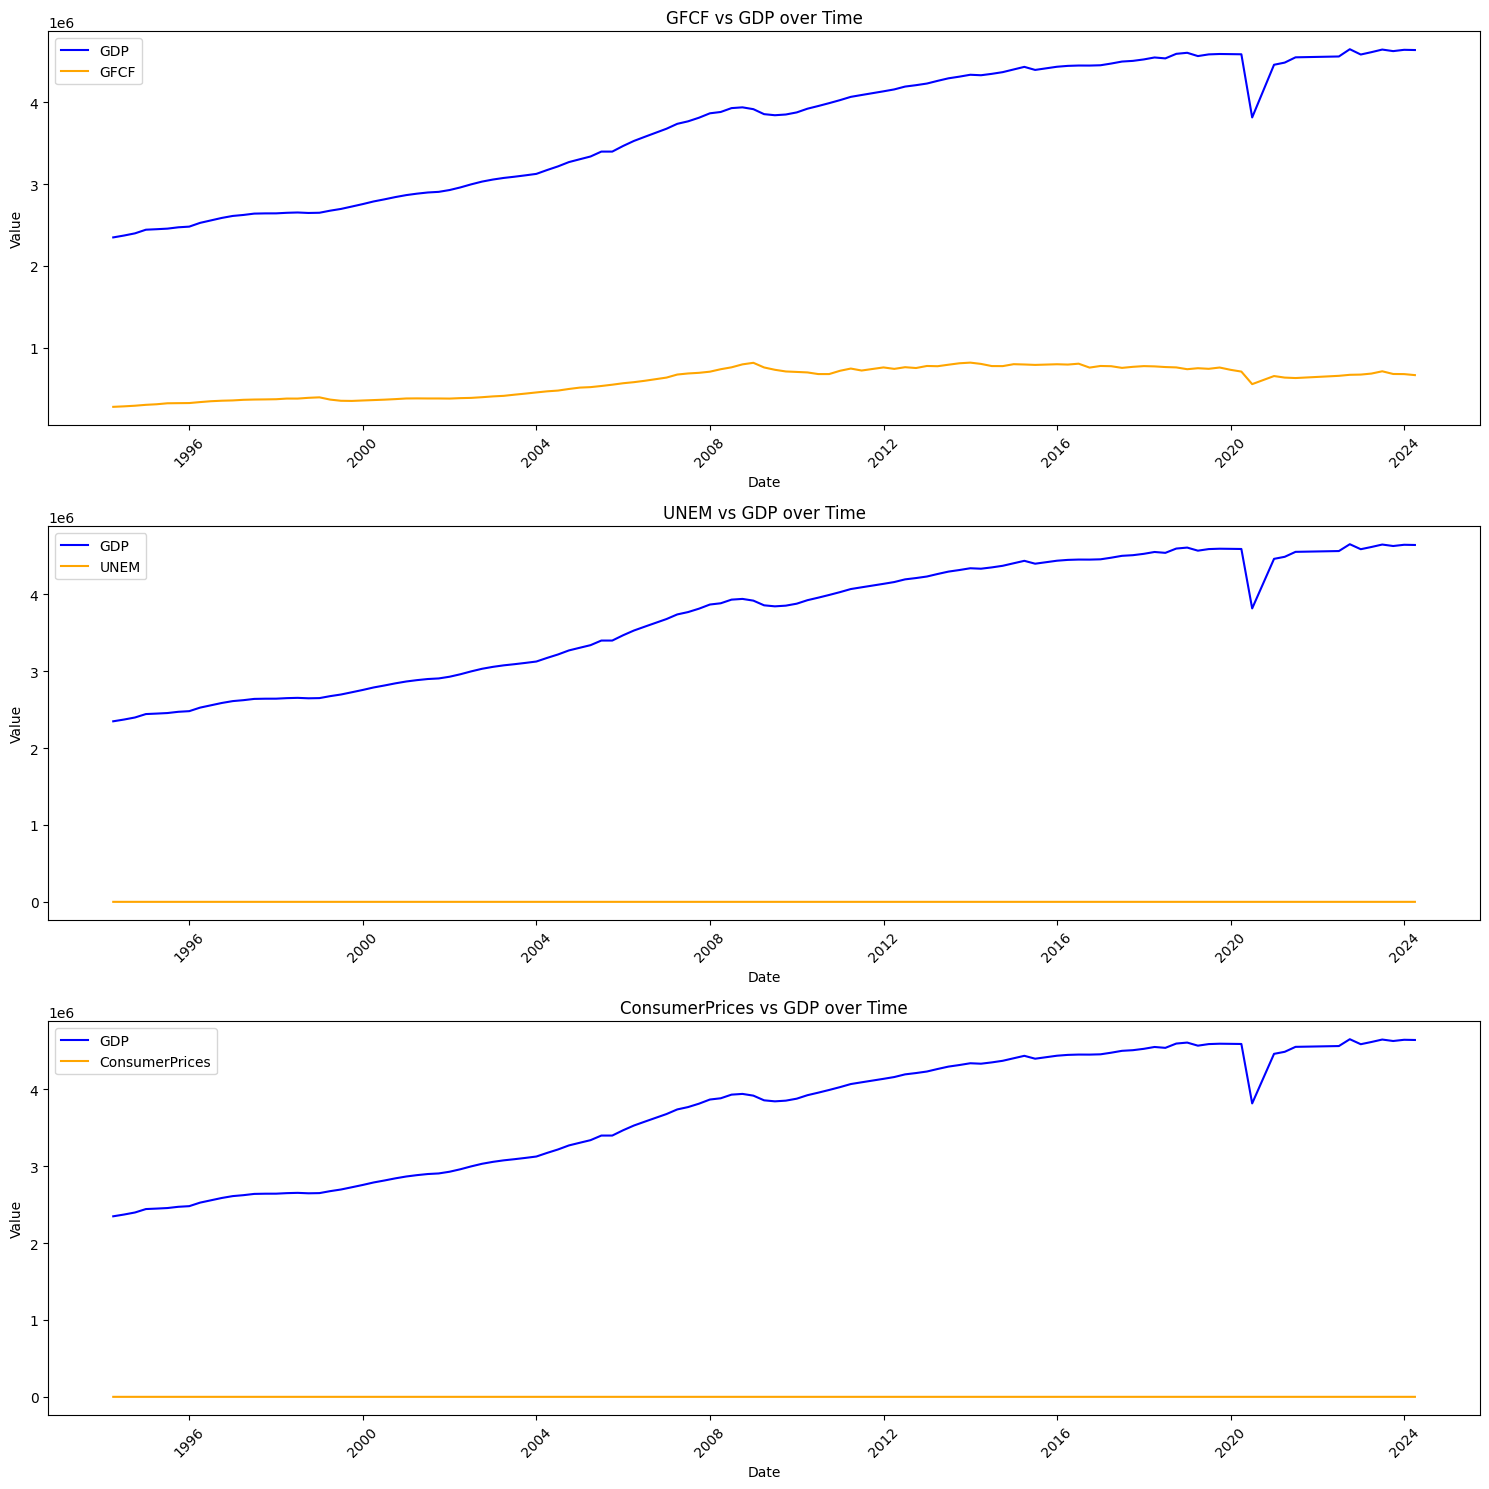

In [ ]:


# Features to plot against GDP (exclude 'Date' and 'GDP')
features = [col for col in GDP_selected.columns if col not in ['Date', 'GDP']]

plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.plot(GDP_selected['Date'], GDP_selected['GDP'], label='GDP', color='blue')
    plt.plot(GDP_selected['Date'], GDP_selected[feature], label=feature, color='orange')
    plt.title(f'{feature} vs GDP over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Model Training

In [ ]:

from sklearn.model_selection import train_test_split

# Features and target
X = GDP_selected[['GFCF', 'UNEM', 'ConsumerPrices']]
y = GDP_selected['GDP']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}')



Train size: 91, Test size: 23


In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


Linear Regression --> F1: 0.65, Precision: 1.00, Recall: 0.48


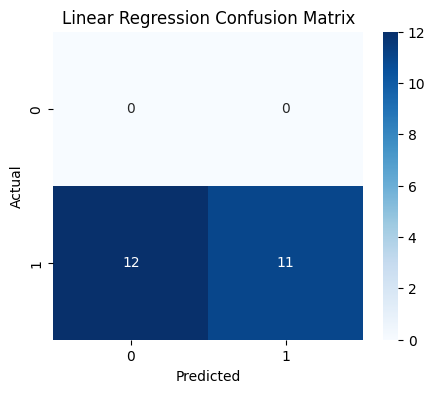

Random Forest --> F1: 1.00, Precision: 1.00, Recall: 1.00


c:\Users\A257528\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.


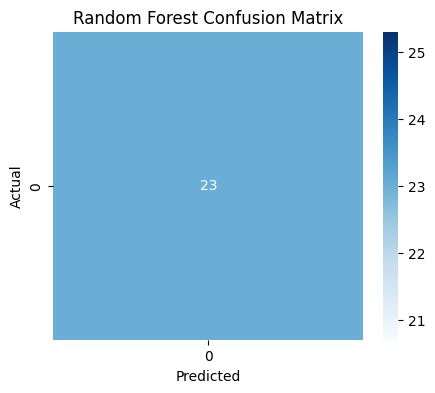

In [321]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert GDP to binary classes: 1 if above median, 0 if below
threshold = np.median(y_train)
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Train models on the same features
lr_model.fit(X_train, y_train_class)
rf_model.fit(X_train, y_train_class)

# Predictions (binary)
y_pred_lr_class = lr_model.predict(X_test)
y_pred_lr_class = np.round(y_pred_lr_class).astype(int)  # ensure 0/1

y_pred_rf_class = rf_model.predict(X_test)
y_pred_rf_class = np.round(y_pred_rf_class).astype(int)  # ensure 0/1

# Evaluation function
def evaluate_classification(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"{model_name} --> F1: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate both models
evaluate_classification(y_test_class, y_pred_lr_class, "Linear Regression")
evaluate_classification(y_test_class, y_pred_rf_class, "Random Forest")


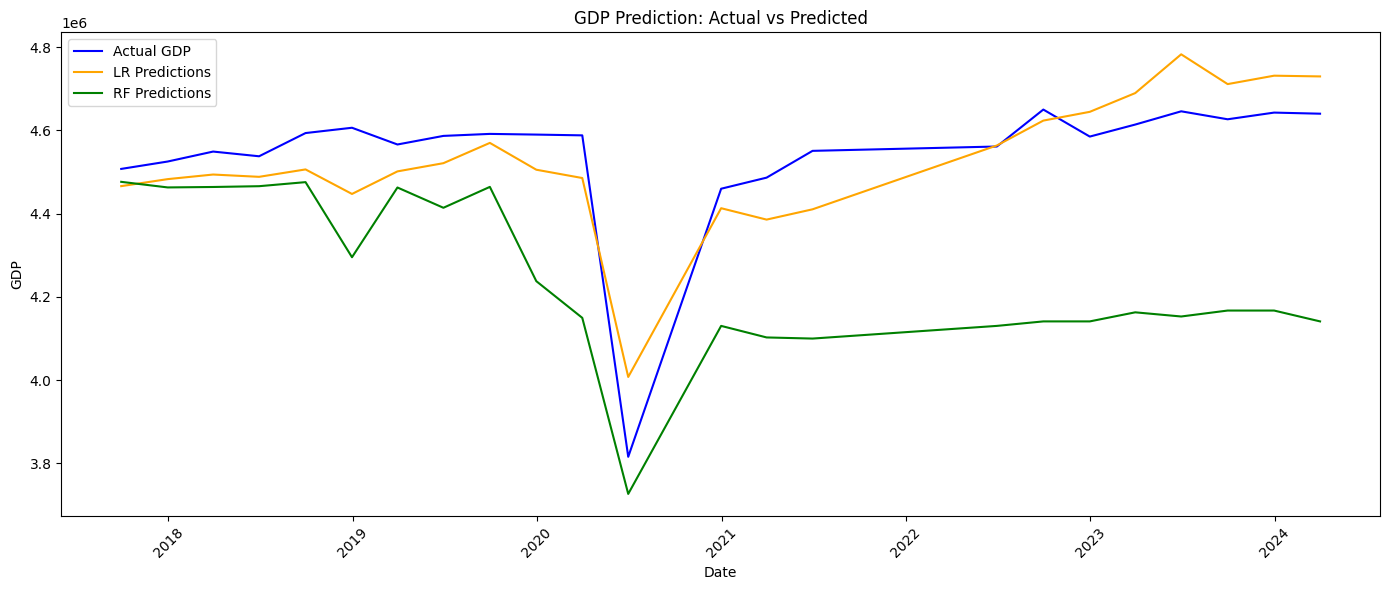

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(GDP_selected['Date'].iloc[-len(y_test):], y_test, label='Actual GDP', color='blue')
plt.plot(GDP_selected['Date'].iloc[-len(y_test):], y_pred_lr, label='LR Predictions', color='orange')
plt.plot(GDP_selected['Date'].iloc[-len(y_test):], y_pred_rf, label='RF Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Prediction: Actual vs Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
